In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
%matplotlib inline

In [2]:
def load_halo_summary(filename):
    dtype=[('Nsat','i8'),
           ('vmax', 'f8'),
           ('mstar', 'f8'), 
           ('d', 'f8'),
           ('r_ab_x', 'f8'), ('r_ab_y', 'f8'),('r_ab_z','f8'),
           ('min_r_sat', 'f8'), ('max_r_sat', 'f8'),
           ('a', 'f8'),
           ('b', 'f8'),
           ('c', 'f8'),
           ('Ia_x', 'f8'),
           ('Ia_y', 'f8'),
           ('Ia_z', 'f8'),
           ('plane_width', 'f8'),
           ('plane_distance','f8'),
           ('plane_x','f8'),('plane_y','f8'),('plane_z','f8'),
           ('rand_p_width_mean','f8'),('rand_p_width_std','f8'),
           ('rand_p_center_mean','f8'), ('rand_p_center_std','f8'),
          ('beta', 'f8'),]
    file_data = np.loadtxt(filename, dtype=dtype)    
    return file_data

In [106]:
def plot_alignment(M31_summary, MW_summary, n_sat, output_name="mu_lg"):
    final_n = n_sat[-1]
    n_iter = len(n_sat)
    column = 7
    MW_obs_mu_plane = np.ones(n_iter)
    M31_obs_mu_plane = np.ones(n_iter)
    MW_randomized = np.ones(n_iter)
    M31_randomized = np.ones(n_iter)
    MW_randomized_std = np.ones(n_iter)
    M31_randomized_std = np.ones(n_iter)
    for i in range(n_iter):
        data_M31 = M31_summary[n_sat[i]]
        M31_obs_mu_plane[i] = np.abs(data_M31[0,column])
        M31_randomized[i] = np.mean(np.abs(data_M31[:,column]))
        M31_randomized_std[i] = np.std(np.abs(data_M31[:,column]))
    
        data_MW = MW_summary[n_sat[i]]
        MW_obs_mu_plane[i] = np.abs(data_MW[0,column])
        MW_randomized[i] = np.mean(np.abs(data_MW[:,column]))
        MW_randomized_std[i] = np.std(np.abs(data_MW[:,column]))

    data_M31 = M31_summary[final_n]
    data_MW = MW_summary[final_n]

    fig = plt.figure(1, figsize=(13,6))
    #fig.tight_layout()
    plt.rc('text', usetex=True,)
    plt.rc('font', family='serif', size=25)

    plt.subplot(121)
    plt.scatter(M31_obs_mu_plane, MW_obs_mu_plane, 
            s=1000, label='Observations', marker="*", color='white', linewidth=1, alpha=1.0, edgecolor='black')
    plt.errorbar(M31_randomized, MW_randomized, xerr=MW_randomized_std, yerr=M31_randomized_std, 
            fmt='o', markersize=20, color='black', capsize=4, elinewidth=1, alpha=0.4, label='Randomized')
#plt.hist2d(np.abs(data_M31[:,column]), np.abs(data_MW[:,column]), bins=40, cmap='gray_r', label='Randomized')

    plt.xticks(np.arange(0,2,0.2))
    plt.yticks(np.arange(0,2,0.2))
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel(r"M31 $\hat{I}_a\cdot \hat{r}_{AB} $")
    plt.ylabel(r"MW $\hat{I}_a\cdot \hat{r}_{AB} $")
    plt.legend(loc=3)

    plt.subplot(122)
    
    plt.plot(n_sat, M31_obs_mu_plane, label="M31", linewidth=3, color='black')
    plt.plot(n_sat, MW_obs_mu_plane, "--", label="MW", linewidth=3, color='black')
    #plt.yticks(np.arange(0,1,0.2))
    #plt.xticks(np.arange(1,25,1))
    #plt.xlim([11,max(n_sat)])
    #plt.ylim([0,1])
    plt.ylabel(r"$ \hat{I}_a \cdot \hat{r}_{AB}$")
    plt.xlabel(r"Number of Satellites")
    plt.legend()

    plt.tight_layout()
    plt.savefig("../paper/{}.pdf".format(output_name), bbox_inches='tight')

In [107]:
def plot_width(M31_summary, MW_summary, n_sat, output_name="planewidth_lg"):

    final_n = n_sat[-1]
    n_iter = len(n_sat)
    column = 6
    MW_obs_mu_plane = np.ones(n_iter)
    M31_obs_mu_plane = np.ones(n_iter)
    MW_randomized = np.ones(n_iter)
    M31_randomized = np.ones(n_iter)
    MW_randomized_std = np.ones(n_iter)
    M31_randomized_std = np.ones(n_iter)
    for i in range(n_iter):
        data_M31 = M31_summary[n_sat[i]]
        M31_obs_mu_plane[i] = np.abs(data_M31[0,column])
        data_MW = MW_summary[n_sat[i]]
        MW_obs_mu_plane[i] = np.abs(data_MW[0,column])

        M31_randomized[i] = np.mean(np.abs(data_M31[:,column]))
        M31_randomized_std[i] = np.std(np.abs(data_M31[:,column]))
        MW_randomized[i] = np.mean(np.abs(data_MW[:,column]))
        MW_randomized_std[i] = np.std(np.abs(data_MW[:,column]))
    
    data_M31 = M31_summary[final_n]
    data_MW = MW_summary[final_n]

    fig = plt.figure(1, figsize=(13,6))
    #fig.tight_layout()
    plt.rc('text', usetex=True,)
    plt.rc('font', family='serif', size=25)

    plt.subplot(121)
    plt.scatter(M31_obs_mu_plane, MW_obs_mu_plane, 
            s=1000, label='Observations', marker="*", color='white', linewidth=1, alpha=1.0, edgecolor='black') 
    plt.errorbar(M31_randomized, MW_randomized, xerr=MW_randomized_std, yerr=M31_randomized_std, 
            fmt='o', markersize=20, color='black', capsize=4, elinewidth=1, alpha=0.4, label='Randomized')



    #plt.xticks(np.arange(0,200,10))
    #plt.yticks(np.arange(0,200,10))
    #plt.ylim([0,60])
    #plt.xlim([40,100])
    plt.xlabel(r"M31 Plane Width [kpc]")
    plt.ylabel(r"MW Plane Width [kpc]")
    plt.legend(loc=4)

    plt.subplot(122)
    plt.plot(n_sat, M31_obs_mu_plane, label="M31", linewidth=3, color='black')
    plt.plot(n_sat, MW_obs_mu_plane, "--", label="MW", linewidth=3, color='black')
    #plt.xticks(np.arange(10,30,5))
    plt.ylabel(r"Plane Width [kpc]")
    plt.xlabel(r"Number of Satellites")
    plt.legend()

    plt.tight_layout()
    plt.savefig("../paper/{}.pdf".format(output_name), bbox_inches='tight')

In [91]:
n_sat = np.arange(11,16)
MW_summary = {}
M31_summary = {}
for i in n_sat:
    filename_MW = "../data/obs_summary/halo_MW_nmax_{}.dat".format(i)
    MW_summary[i] = np.loadtxt(filename_MW)
    filename_M31 = "../data/obs_summary/halo_M31_nmax_{}.dat".format(i)
    M31_summary[i] = np.loadtxt(filename_M31)

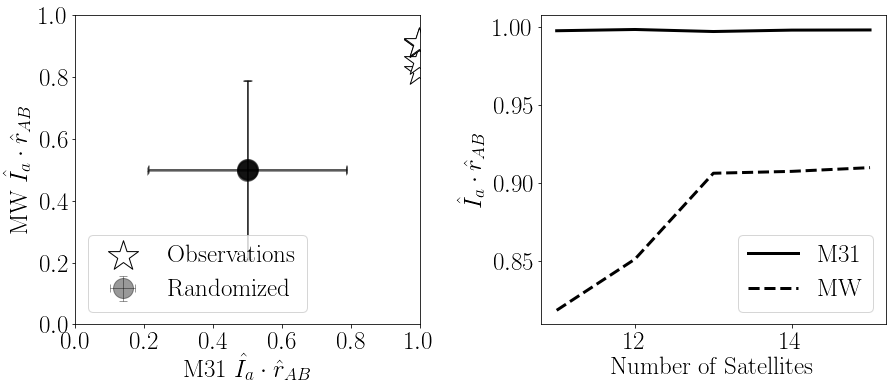

In [87]:
plot_alignment(M31_summary, MW_summary, n_sat)

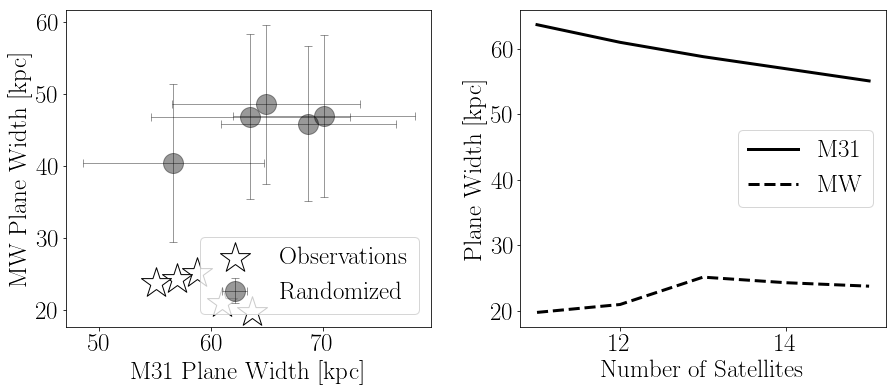

In [97]:
plot_width(M31_summary, MW_summary, n_sat)

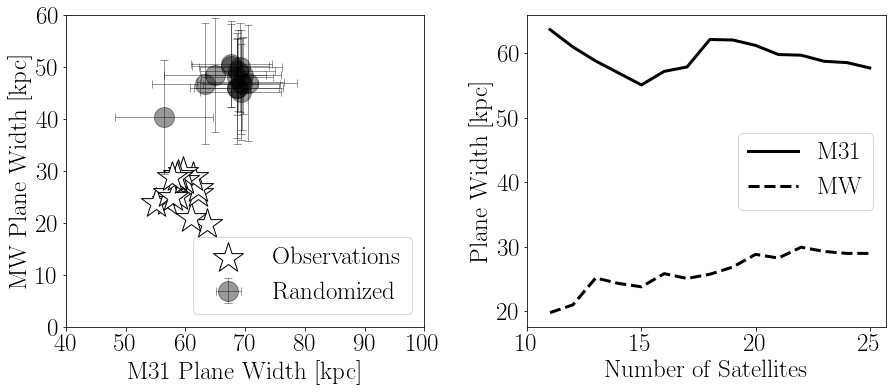

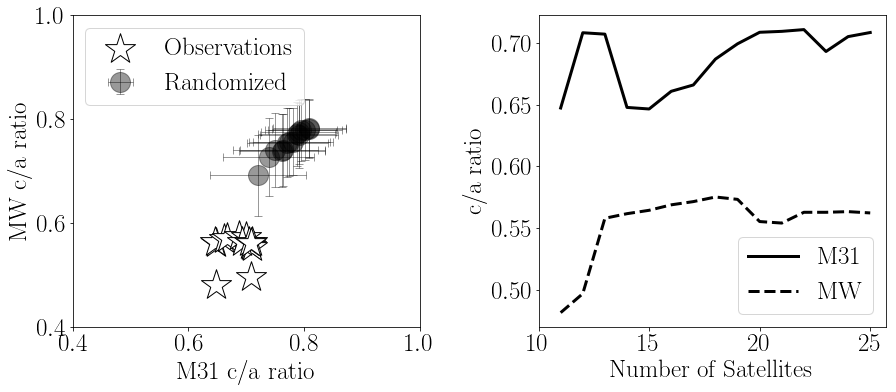

In [12]:
final_n = n_sat[-1]
final_n = n_sat[-1]
column_C = 2
column_A = 4
MW_obs_mu_plane = np.ones(n_iter)
M31_obs_mu_plane = np.ones(n_iter)
MW_randomized = np.ones(n_iter)
M31_randomized = np.ones(n_iter)
MW_randomized_std = np.ones(n_iter)
M31_randomized_std = np.ones(n_iter)
for i in range(n_iter):
    data_M31 = M31_summary[n_sat[i]]
    ca_ratio_M31 = np.sqrt(data_M31[:,column_C]/data_M31[:,column_A])
    M31_obs_mu_plane[i] = ca_ratio_M31[0]
    
    data_MW = MW_summary[n_sat[i]]
    ca_ratio_MW = np.sqrt(data_MW[:,column_C]/data_MW[:,column_A])
    MW_obs_mu_plane[i] = ca_ratio_MW[0]
    
    M31_randomized[i] = np.mean(ca_ratio_M31)
    M31_randomized_std[i] = np.std(ca_ratio_M31)
    MW_randomized[i] = np.mean(ca_ratio_MW)
    MW_randomized_std[i] = np.std(ca_ratio_MW)

data_M31 = M31_summary[final_n]
data_MW = MW_summary[final_n]

fig = plt.figure(1, figsize=(13,6))
#fig.tight_layout()
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

plt.subplot(121)
plt.scatter(M31_obs_mu_plane, MW_obs_mu_plane, 
            s=1000, label='Observations', marker="*", color='white', linewidth=1, alpha=1.0, edgecolor='black') 
plt.errorbar(M31_randomized, MW_randomized, xerr=MW_randomized_std, yerr=M31_randomized_std, 
            fmt='o', markersize=20, color='black', capsize=4, elinewidth=1, alpha=0.4, label='Randomized')
#plt.hist2d(ca_ratio_M31, ca_ratio_MW, bins=40, cmap='gray_r', label='Randomized')

plt.xticks(np.arange(0,2,0.2))
plt.yticks(np.arange(0,2,0.2))
plt.xlim([0.4,1.0])
plt.ylim([0.4,1.0])
plt.xlabel(r"M31 c/a ratio ")
plt.ylabel(r"MW c/a ratio")
plt.legend(loc=2)

plt.subplot(122)
plt.plot(n_sat, M31_obs_mu_plane, label="M31", linewidth=3, color='black')
plt.plot(n_sat, MW_obs_mu_plane, "--", label="MW", linewidth=3, color='black')
plt.xticks(np.arange(10,30,5))
plt.ylabel(r"c/a ratio")
plt.xlabel(r"Number of Satellites")
plt.legend()

plt.tight_layout()
plt.savefig("../paper/ca_ratio_lg.pdf", bbox_inches='tight')

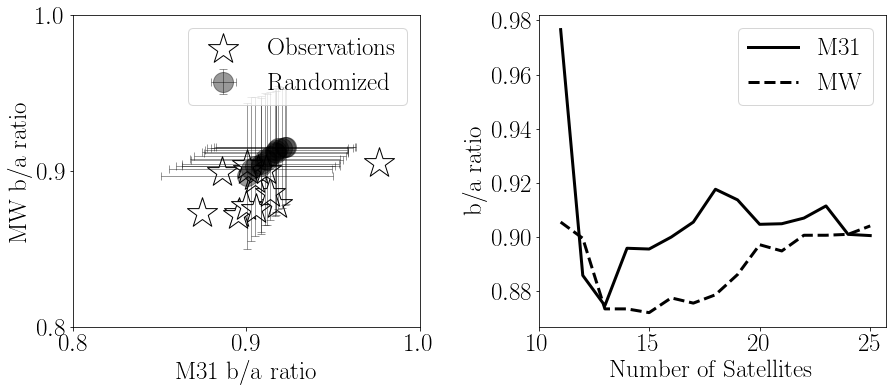

In [14]:
final_n = n_sat[-1]
final_n = n_sat[-1]
column_B = 3
column_A = 4
MW_obs_mu_plane = np.ones(n_iter)
M31_obs_mu_plane = np.ones(n_iter)
MW_randomized = np.ones(n_iter)
M31_randomized = np.ones(n_iter)
MW_randomized_std = np.ones(n_iter)
M31_randomized_std = np.ones(n_iter)
for i in range(n_iter):
    data_M31 = M31_summary[n_sat[i]]
    ba_ratio_M31 = np.sqrt(data_M31[:,column_B]/data_M31[:,column_A])
    M31_obs_mu_plane[i] = ba_ratio_M31[0]
    
    data_MW = MW_summary[n_sat[i]]
    ba_ratio_MW = np.sqrt(data_MW[:,column_B]/data_MW[:,column_A])
    MW_obs_mu_plane[i] = ba_ratio_MW[0]
        
    M31_randomized[i] = np.mean(ba_ratio_M31)
    M31_randomized_std[i] = np.std(ba_ratio_M31)
    MW_randomized[i] = np.mean(ba_ratio_MW)
    MW_randomized_std[i] = np.std(ba_ratio_MW)


data_M31 = M31_summary[final_n]
data_MW = MW_summary[final_n]

fig = plt.figure(1, figsize=(13,6))
#fig.tight_layout()
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)

plt.subplot(121)
 #facecolors='white')
plt.errorbar(M31_randomized, MW_randomized, xerr=MW_randomized_std, yerr=M31_randomized_std, 
            fmt='o', markersize=20, color='black', capsize=4, elinewidth=1, alpha=0.4, label='Randomized')
plt.scatter(M31_obs_mu_plane, MW_obs_mu_plane, 
            s=1000, label='Observations', marker="*", color='white', linewidth=1, alpha=1.0, edgecolor='black')
#plt.hist2d(ba_ratio_M31, ba_ratio_MW, bins=40, cmap='gray_r', label='Randomized')

plt.xticks(np.arange(0,2,0.1))
plt.yticks(np.arange(0,2,0.1))
plt.xlim([0.8,1.0])
plt.ylim([0.8,1.0])
plt.xlabel(r"M31 b/a ratio ")
plt.ylabel(r"MW b/a ratio")
plt.legend(loc=1)

plt.subplot(122)
plt.plot(n_sat, M31_obs_mu_plane, label="M31", linewidth=3, color='black')
plt.plot(n_sat, MW_obs_mu_plane, "--", label="MW", linewidth=3, color='black')
plt.xticks(np.arange(10,30,5))
plt.ylabel(r"b/a ratio")
plt.xlabel(r"Number of Satellites")
plt.legend()

plt.tight_layout()
plt.savefig("../paper/ba_ratio_lg.pdf", bbox_inches='tight')

In [125]:
group_id = 22
n_sat = np.arange(11,16)
n_iter = len(n_sat)
MW_summary = {}
M31_summary = {}
for i in n_sat:
    filename_MW = "../data/mstar_selected_summary/Illustris_MW_group_{}_nmax_{}.dat".format(group_id, i)
    MW_summary[i] = np.loadtxt(filename_MW)
    filename_M31 = "../data/mstar_selected_summary/Illustris_M31_group_{}_nmax_{}.dat".format(group_id, i)
    M31_summary[i] = np.loadtxt(filename_M31)



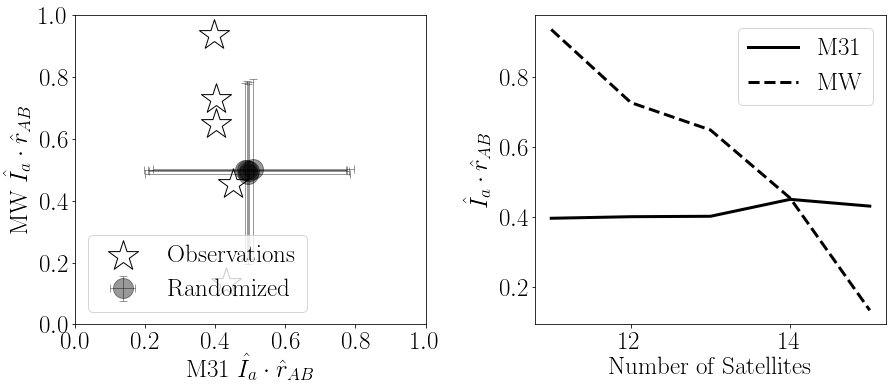

In [126]:
plot_alignment(M31_summary, MW_summary, n_sat, output_name="mu_group_{}".format(group_id))


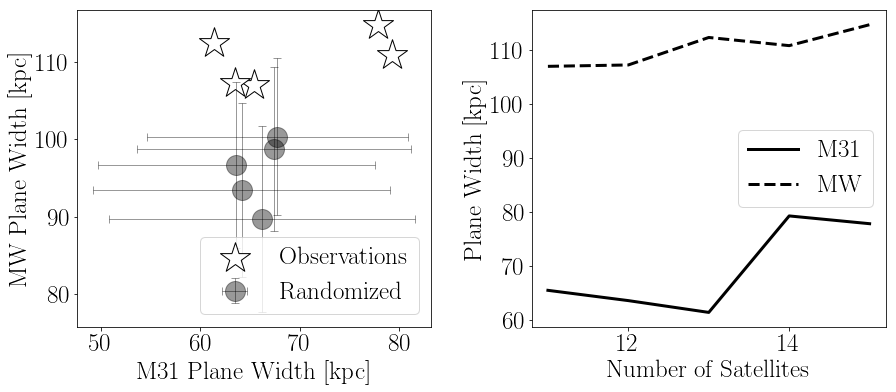

In [127]:
plot_width(M31_summary, MW_summary, n_sat, output_name="planewidth_{}".format(group_id))